In [30]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

In [32]:
df = (
    pd.read_csv("2845651.csv")[["DATE", "TMAX"]].astype({"DATE": 'datetime64[ns]'})
    .set_index("DATE").query("DATE >= '1940-01-01'")
)
df.head()

,TMAX
DATE,
1940-01-01,24.0
1940-01-02,29.0
1940-01-03,32.0
1940-01-04,32.0
1940-01-05,29.0


<AxesSubplot:xlabel='DATE'>

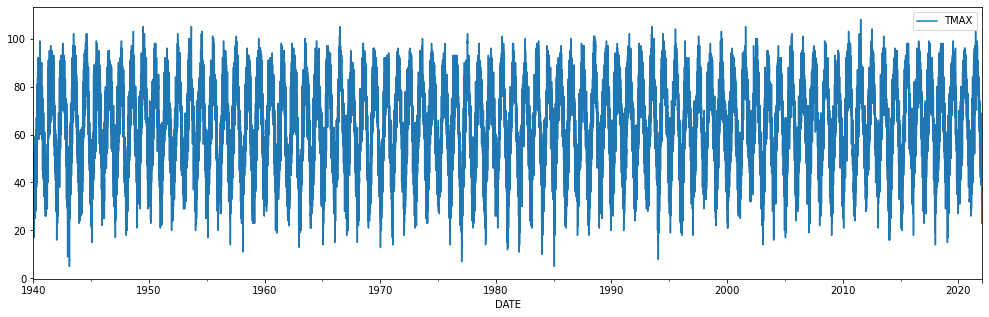

In [33]:
df.plot(figsize=(17,5))

In [36]:
# get rid of the occasional nan values
w_df = df[np.isnan(df['TMAX']) == False].assign(year=lambda df: df.index.year)
X_df = pd.DataFrame(w_df['year'] - np.min(w_df['year']))
X_df['const'] = 1.0
y = w_df['TMAX']


X_df

,year,const
DATE,,
1940-01-01,0,1.0
1940-01-02,0,1.0
1940-01-03,0,1.0
1940-01-04,0,1.0
1940-01-05,0,1.0
...,...,...
2022-01-10,82,1.0
2022-01-11,82,1.0
2022-01-12,82,1.0


In [37]:
year_model = sm.GLM(y, X_df).fit()
year_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   TMAX   No. Observations:                29964
Model:                            GLM   Df Residuals:                    29962
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          356.69
Method:                          IRLS   Log-Likelihood:            -1.3056e+05
Date:                Mon, 17 Jan 2022   Deviance:                   1.0687e+07
Time:                        20:38:39   Pearson chi2:                 1.07e+07
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.0330      0.005      7.164      0.000       0.024       0.042
const         62.0004      0.216    286.743      0.000      61.577      62.424
==============================================================================
"""

In [51]:
X_df = pd.get_dummies(w_df.index.month, prefix="month")
month_vars = list(X_df.columns)
X_df['year'] = w_df.reset_index()['year'] - np.min(w_df['year'])
X_df = X_df.set_index(w_df.index)
X_df

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year
DATE,,,,,,,,,,,,,
1940-01-01,1,0,0,0,0,0,0,0,0,0,0,0,0
1940-01-02,1,0,0,0,0,0,0,0,0,0,0,0,0
1940-01-03,1,0,0,0,0,0,0,0,0,0,0,0,0
1940-01-04,1,0,0,0,0,0,0,0,0,0,0,0,0
1940-01-05,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,1,0,0,0,0,0,0,0,0,0,0,0,82
2022-01-11,1,0,0,0,0,0,0,0,0,0,0,0,82
2022-01-12,1,0,0,0,0,0,0,0,0,0,0,0,82


In [53]:
monthly_model = sm.GLM(y, X_df[month_vars+['year']]).fit()
monthly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   TMAX   No. Observations:                29964
Model:                            GLM   Df Residuals:                    29951
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                          82.323
Method:                          IRLS   Log-Likelihood:            -1.0859e+05
Date:                Mon, 17 Jan 2022   Deviance:                   2.4657e+06
Time:                        21:35:34   Pearson chi2:                 2.47e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
month_1       37.6048      0.201    187.243      0.000      37.211      37.998
month_2       40.1907      0.209    192.557      0.000      39.782      40.600
month_3       48.9239      0.201    243.341      0.000      48.530      49.318
month_4       60.5373      0.204    297.163      0.000      60.138      60.937
month_5       70.8905      0.201    352.600      0.000      70.496      71.285
month_6       80.0804      0.204    393.095      0.000      79.681      80.480
month_7       84.9849      0.201    422.704      0.000      84.591      85.379
month_8       82.9715      0.201    412.690      0.000      82.577      83.366
month_9       75.9495      0.204    372.818      0.000      75.550      76.349
month_10      64.9762      0.201    323.183      0.000      64.582      65.370
month_11      53.3166      0.204    261.718      0.000      52.917      53.716
month_12      42.1072      0.201    209.419      0.000      41.713      42.501
year           0.0338      0.002     15.265      0.000       0.029       0.038
==============================================================================
"""

## Interaction

In [58]:
X_df = pd.get_dummies(w_df.index.month, prefix="month")
month_vars = list(X_df.columns)

X_df['year'] = w_df.reset_index()['year'] - np.min(w_df['year'])
X_df = X_df.set_index(w_df.index)
X_df

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year
DATE,,,,,,,,,,,,,
1940-01-01,1,0,0,0,0,0,0,0,0,0,0,0,0
1940-01-02,1,0,0,0,0,0,0,0,0,0,0,0,0
1940-01-03,1,0,0,0,0,0,0,0,0,0,0,0,0
1940-01-04,1,0,0,0,0,0,0,0,0,0,0,0,0
1940-01-05,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,1,0,0,0,0,0,0,0,0,0,0,0,82
2022-01-11,1,0,0,0,0,0,0,0,0,0,0,0,82
2022-01-12,1,0,0,0,0,0,0,0,0,0,0,0,82


In [60]:
interaction_vars = []
for c in month_vars:
    v = f"{c}_i"
    X_df[v] = X_df[c] * X_df['year']
    
    interaction_vars += [v]

In [62]:
i_monthly_model = sm.GLM(y, X_df[interaction_vars+month_vars+['year']]).fit()
i_monthly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   TMAX   No. Observations:                29964
Model:                            GLM   Df Residuals:                    29940
Model Family:                Gaussian   Df Model:                           23
Link Function:               identity   Scale:                          82.229
Method:                          IRLS   Log-Likelihood:            -1.0857e+05
Date:                Mon, 17 Jan 2022   Deviance:                   2.4619e+06
Time:                        21:41:55   Pearson chi2:                 2.46e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
month_1_i      0.0051      0.007      0.704      0.481      -0.009       0.019
month_2_i      0.0205      0.008      2.697      0.007       0.006       0.035
month_3_i      0.0180      0.007      2.472      0.013       0.004       0.032
month_4_i      0.0044      0.007      0.594      0.553      -0.010       0.019
month_5_i     -0.0043      0.007     -0.588      0.557      -0.019       0.010
month_6_i     -0.0057      0.007     -0.767      0.443      -0.020       0.009
month_7_i     -0.0012      0.007     -0.166      0.868      -0.015       0.013
month_8_i      0.0028      0.007      0.385      0.700      -0.011       0.017
month_9_i     -0.0053      0.007     -0.722      0.471      -0.020       0.009
month_10_i    -0.0272      0.007     -3.736      0.000      -0.041      -0.013
month_11_i    -0.0083      0.007     -1.124      0.261      -0.023       0.006
month_12_i     0.0325      0.007      4.459      0.000       0.018       0.047
month_1       37.5010      0.355    105.498      0.000      36.804      38.198
month_2       39.4637      0.373    105.727      0.000      38.732      40.195
month_3       48.2978      0.356    135.498      0.000      47.599      48.996
month_4       60.4625      0.362    166.868      0.000      59.752      61.173
month_5       71.1667      0.356    199.656      0.000      70.468      71.865
month_6       80.4130      0.362    221.928      0.000      79.703      81.123
month_7       85.1367      0.356    238.849      0.000      84.438      85.835
month_8       82.9608      0.356    232.745      0.000      82.262      83.659
month_9       76.2685      0.362    210.490      0.000      75.558      76.979
month_10      66.1811      0.356    185.669      0.000      65.482      66.880
month_11      53.7561      0.362    148.359      0.000      53.046      54.466
month_12      40.8947      0.357    114.708      0.000      40.196      41.593
year           0.0312      0.002     15.296      0.000       0.027       0.035
==============================================================================
"""

* there's an increase of 0.0312 every year. So it's kinda getting warmer
* July is warming up as the year goes, with coeff month_7_i = -0.0012 (doesn't change the base rate of 0.0312)
* October feels the same pretty much, month_10_i = -0.0272 (it compensates the yearly growth 0.0312; 0.0312 -0.0272=0.004)
* December month_12_i is warmer definitely (p_value, low std.err, 0.0312+0.0325)


Based on our model the average December day today in 2021 should be about 46F while the average day in March in 1940 was 48F. In 30 more years, assuming the same constant rate of change (which is a big assumption in a changing world) Decembers will feel like March did to my grandparents.

In [63]:
0.0312 -0.0272

0.004